In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno

In [2]:
datitosRL=pd.read_csv('datos_regresion_Murphy.csv',sep=';')

In [3]:
datitosRL.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
datitosRL.shape

(4119, 21)

In [5]:
datitosRL.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
datitosRL.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<AxesSubplot:>

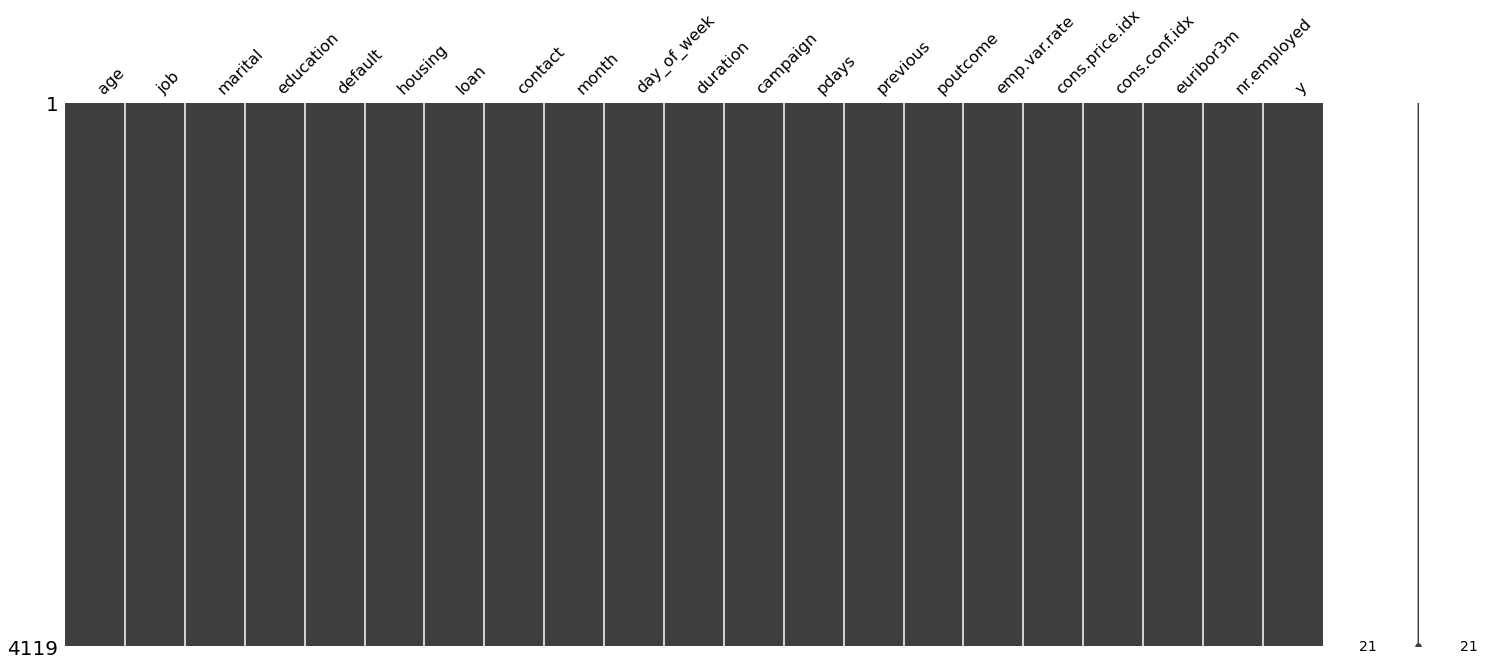

In [7]:
msno.matrix(datitosRL)

In [8]:
datitosRL["education"] = np.where(datitosRL["education"]=="basic.4y", "Basic", datitosRL["education"])
datitosRL["education"] = np.where(datitosRL["education"]=="basic.6y", "Basic", datitosRL["education"])
datitosRL["education"] = np.where(datitosRL["education"]=="basic.9y", "Basic", datitosRL["education"])

datitosRL["education"] = np.where(datitosRL["education"]=="high.school", "High School", datitosRL["education"])
datitosRL["education"] = np.where(datitosRL["education"]=="professional.course", "Professional Course", datitosRL["education"])
datitosRL["education"] = np.where(datitosRL["education"]=="illiterate", "Illiterate", datitosRL["education"])
datitosRL["education"] = np.where(datitosRL["education"]=="unknown", "Unknown", datitosRL["education"])

In [9]:
datitosRL.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
datitosRL.groupby("y").count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668
yes,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451


In [11]:
datitosRL.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
datitosRL.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180


Text(0, 0.5, 'Frecuencia de compra del producto')

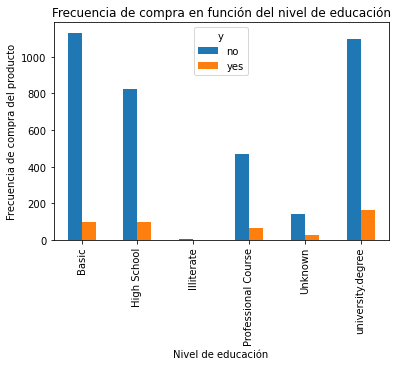

In [13]:
%matplotlib inline
pd.crosstab(datitosRL.education, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")

In [14]:
datitosRL.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


Text(0, 0.5, 'Frecuencia de compra del producto')

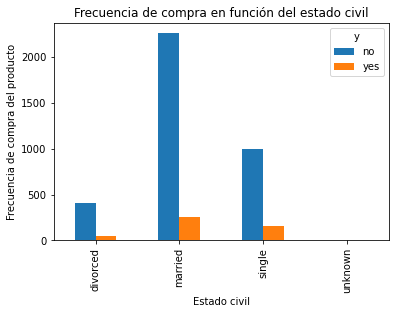

In [15]:
%matplotlib inline
pd.crosstab(datitosRL.marital, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del estado civil")
plt.xlabel("Estado civil")
plt.ylabel("Frecuencia de compra del producto")

In [16]:
datitosRL.groupby("month").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
month,,,,,,,,,,
apr,41.158140,291.293023,1.962791,966.655814,0.372093,-1.800000,93.118888,-46.286047,1.362698,5093.213488
aug,41.405660,218.435535,2.705975,955.224843,0.135220,0.732075,93.327670,-35.659906,4.270874,5197.916038
dec,46.000000,324.318182,2.636364,773.227273,0.681818,-2.872727,92.714955,-33.586364,0.830318,5030.445455
jul,39.008439,278.015471,3.085795,982.282700,0.054852,1.184529,93.902000,-42.419550,4.710661,5215.130098
jun,39.833962,245.035849,2.988679,968.996226,0.084906,0.651132,94.233887,-41.567925,4.221585,5195.895283
mar,41.895833,274.916667,1.958333,772.125000,0.729167,-1.800000,93.095042,-42.716667,1.179729,5055.783333
may,39.420174,259.260522,2.423803,981.682148,0.171988,-0.204790,93.515037,-40.705806,3.245085,5148.142816
nov,40.340807,257.051570,1.856502,941.091928,0.302691,-0.420179,93.239848,-41.513004,3.675067,5168.913004
oct,44.797101,271.449275,1.463768,855.289855,0.637681,-2.446377,93.178855,-34.624638,1.170957,5017.381159


Text(0, 0.5, 'Frecuencia de compra del producto')

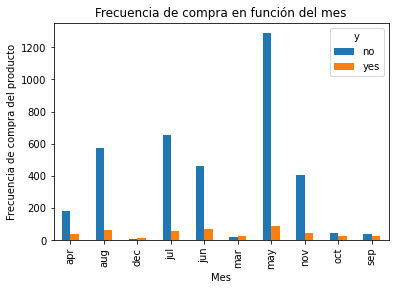

In [17]:
%matplotlib inline
pd.crosstab(datitosRL.month, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

In [18]:
datitosRL.groupby("age").mean()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,,,,,,,,,
18,288.333333,1.000000,336.333333,1.000000,-2.300000,93.427333,-36.033333,0.795333,5005.933333
19,338.000000,4.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.344000,5099.100000
20,195.250000,2.000000,999.000000,0.750000,-2.025000,93.304500,-43.225000,1.107750,5044.825000
21,342.000000,2.000000,999.000000,0.142857,-1.842857,93.275714,-38.214286,1.498000,5056.228571
22,208.100000,2.300000,899.400000,0.400000,0.230000,93.694100,-39.600000,3.752600,5163.850000
...,...,...,...,...,...,...,...,...,...
81,442.666667,2.333333,999.000000,0.666667,-1.533333,93.840333,-44.666667,1.089333,5018.100000
82,297.500000,2.000000,501.000000,1.000000,-1.400000,94.207000,-38.900000,0.879000,4977.600000
85,181.000000,2.000000,999.000000,0.000000,-3.400000,92.431000,-26.900000,0.739000,5017.500000


Text(0, 0.5, 'Frecuencia de compra del producto')

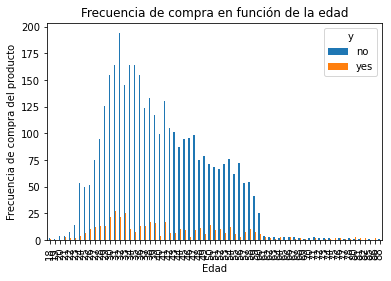

In [19]:
%matplotlib inline
pd.crosstab(datitosRL.age, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compra del producto")

(array([  98.,  821., 1187.,  804.,  616.,  483.,   61.,   22.,   18.,
           9.]),
 array([18., 25., 32., 39., 46., 53., 60., 67., 74., 81., 88.]),
 <BarContainer object of 10 artists>)

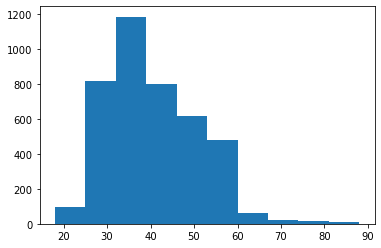

In [21]:
plt.hist(datitosRL['age'])

In [22]:
datitosRL.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341


In [23]:
datitosRL.groupby("job").count()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,,,,,,,,,,
admin.,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012,1012
blue-collar,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884,884
entrepreneur,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
housemaid,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
management,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
retired,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166
self-employed,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159
services,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393,393
student,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82


Text(0, 0.5, 'Frecuencia de compra del producto')

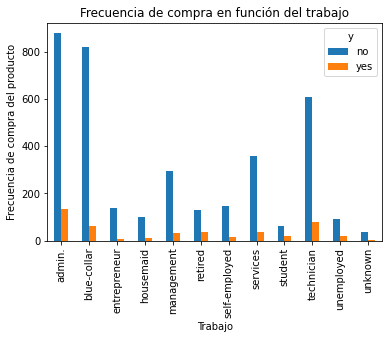

In [24]:
%matplotlib inline
pd.crosstab(datitosRL.job, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del trabajo")
plt.xlabel("Trabajo")
plt.ylabel("Frecuencia de compra del producto")

In [25]:
datitosRL.groupby("housing").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
housing,,,,,,,,,,
no,40.213159,260.585644,2.588363,964.982599,0.172376,0.176998,93.636321,-40.358728,3.719115,5168.835454
unknown,39.523810,243.923810,2.580952,961.190476,0.285714,0.228571,93.634800,-40.207619,3.743962,5171.364762
yes,40.057931,254.198161,2.491954,956.529195,0.200920,0.000230,93.529174,-40.631862,3.532779,5164.255816


Text(0, 0.5, 'Frecuencia de compra del producto')

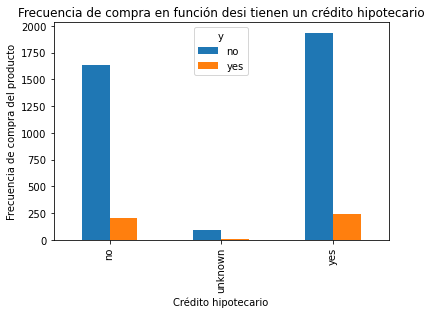

In [26]:
%matplotlib inline
pd.crosstab(datitosRL.housing, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función desi tienen un crédito hipotecario")
plt.xlabel("Crédito hipotecario")
plt.ylabel("Frecuencia de compra del producto")

In [27]:
datitosRL.groupby("loan").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
loan,,,,,,,,,,
no,40.163332,259.236787,2.564049,959.856972,0.190206,0.081188,93.582737,-40.512213,3.612484,5165.858107
unknown,39.523810,243.923810,2.580952,961.190476,0.285714,0.228571,93.634800,-40.207619,3.743962,5171.364762
yes,39.956391,246.487218,2.395489,963.147368,0.175940,0.081353,93.555732,-40.479098,3.646675,5168.851128


Text(0, 0.5, 'Frecuencia de compra del producto')

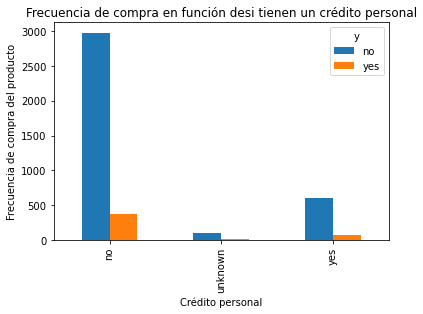

In [29]:
%matplotlib inline
pd.crosstab(datitosRL.loan, datitosRL.y).plot(kind="bar")
plt.title("Frecuencia de compra en función desi tienen un crédito personal")
plt.xlabel("Crédito personal")
plt.ylabel("Frecuencia de compra del producto")

In [30]:
datitosRL["y"] = (datitosRL["y"]=="yes").astype(int)

In [31]:
datitosRL["y"]

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int32

In [32]:
data_corr=datitosRL[["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]]

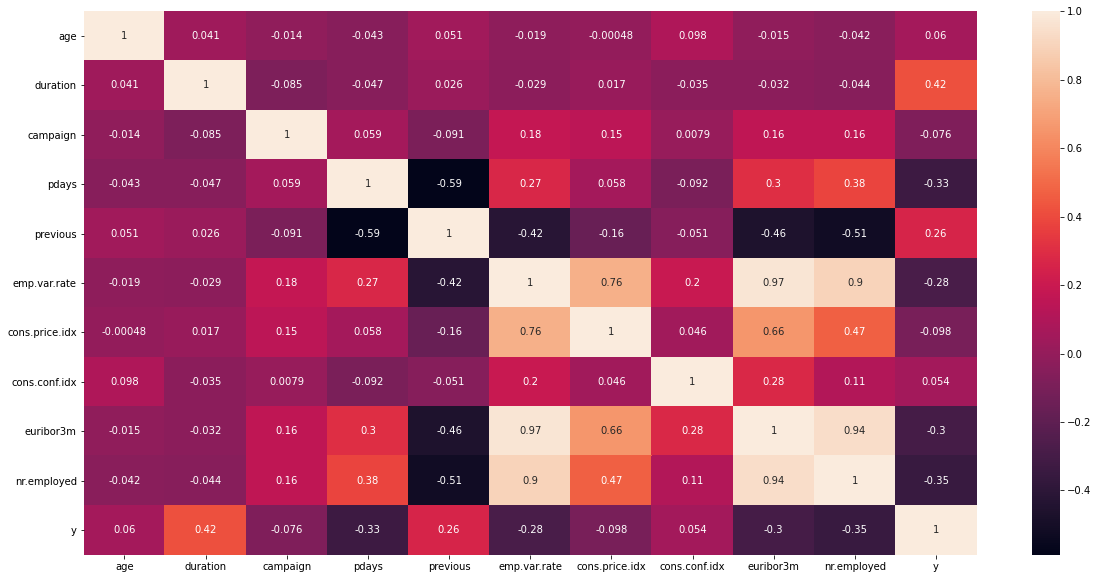

In [33]:
plt.figure(figsize=(20,10))
sn.heatmap(data_corr.corr(), annot=True)
plt.show()

In [34]:
datitosRL.groupby(["age", "marital", "education"]).count()

job  default  housing  loan  contact  month  \
age marital  education                                                  
18  single   Unknown        3        3        3     3        3      3   
19  single   High School    1        1        1     1        1      1   
20  single   High School    2        2        2     2        2      2   
             Unknown        2        2        2     2        2      2   
21  married  Basic          1        1        1     1        1      1   
...                       ...      ...      ...   ...      ...    ...   
82  divorced Basic          1        1        1     1        1      1   
    married  Basic          1        1        1     1        1      1   
85  divorced Basic          1        1        1     1        1      1   
86  married  Unknown        2        2        2     2        2      2   
88  divorced Basic          1        1        1     1        1      1   

                          day_of_week  duration  campaign  pdays  previous  \
age marital  education                                                       
18  single   Unknown                3         3         3      3         3   
19  single   High School            1         1         1      1         1   
20  single   High School            2         2         2      2         2   
             Unknown                2         2         2      2         2   
21  married  Basic                  1         1         1      1         1   
...                               ...       ...       ...    ...       ...   
82  divorced Basic                  1         1         1      1         1   
    married  Basic                  1         1         1      1         1   
85  divorced Basic                  1         1         1      1         1   
86  married  Unknown                2         2         2      2         2   
88  divorced Basic                  1         1         1      1         1   

                          poutcome  emp.var.rate  cons.price.idx  \
age marital  education                                             
18  single   Unknown             3             3               3   
19  single   High School         1             1               1   
20  single   High School         2             2               2   
             Unknown             2             2               2   
21  married  Basic               1             1               1   
...                            ...           ...             ...   
82  divorced Basic               1             1               1   
    married  Basic               1             1               1   
85  divorced Basic               1             1               1   
86  married  Unknown             2             2               2   
88  divorced Basic               1             1               1   

                          cons.conf.idx  euribor3m  nr.employed  y  
age marital  education                                              
18  single   Unknown                  3          3            3  3  
19  single   High School              1          1            1  1  
20  single   High School              2          2            2  2  
             Unknown                  2          2            2  2  
21  married  Basic                    1          1            1  1  
...                                 ...        ...          ... ..  
82  divorced Basic                    1          1            1  1  
    married  Basic                    1          1            1  1  
85  divorced Basic                    1          1            1  1  
86  married  Unknown                  2          2            2  2  
88  divorced Basic                    1          1            1  1  

[544 rows x 18 columns]

Text(0.5, 1.0, 'Box Plot de edad')

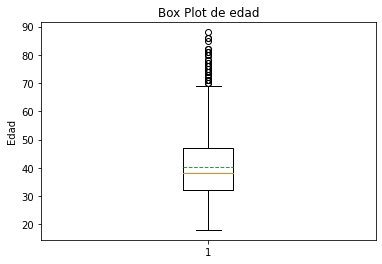

In [35]:
plt.boxplot(datitosRL['age'], showmeans=True, meanline=True)
plt.ylabel('Edad')
plt.title('Box Plot de edad')